The Central Limit Theorm



The Central Limit Theorm is a fundamental relationship which underpins many of principles which make statistical methods work. Put another way, without the Central Limit Theorm much of what we do rountinely would simply not work. Specifically:

- CLT enables sampling methods
- Without a CLT we could not reliably compute confidence intervals
- Most statistical methods and machine learning algorithms rely on CLT. For example, Hypothesis tests rest on the CLT



## The CLT

Sample a population many times, and the distribution of means of all samples are normally distributed, regardless of the population distribution.

More formally, in a simple yet general form we can write the CLT as:

$$\bar{X} = population\ mean = \mu$$

$$distribution(\bar{X})  \rightarrow  N(\mu, \frac{\sigma}{\sqrt{n}})$$

In this example I have created and sampled a distribution created as a mixure of normals. By the CLT the distribution of the mean of the sample should be Normal, dispite the original distribution.

### Generate mixture of Normals

The code in the cell below computes 2000 realizations of a distribution from a mixture of Normal.

In [1]:
import pandas
import numpy
from matplotlib import pyplot
import seaborn
import statsmodels.api as sm
import scipy

%matplotlib inline

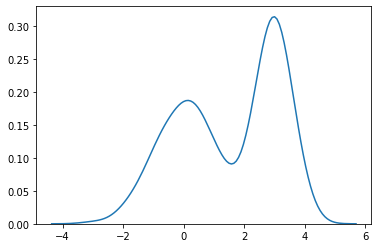

In [2]:
x = numpy.concatenate([
        numpy.random.normal(loc=0, scale=1, size=1000),
        numpy.random.normal(loc=3, scale=.5, size=1000)])
seaborn.kdeplot(x)

## Sample the distribution and examine means

The code in the cell below computes a list of 500 sample means from samples of size 50 from the population distribution. A histogram and Q-Q plot are created from the results are plotted.

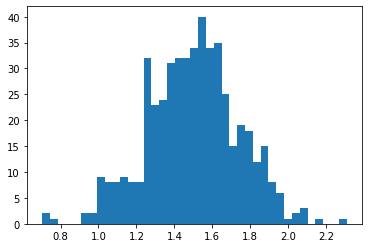

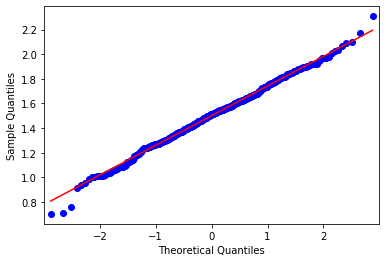

In [3]:
x_means = numpy.array([
        numpy.random.choice(x, size=50, replace=True).mean()
        for i in range(500)])

breaks = numpy.linspace(x_means.min(), x_means.max(), num=40)
_ = pyplot.hist(x_means, bins=breaks)
_ = sm.qqplot(x_means, line='s')

The distribution of the sample means is close to Normal, even though the population is not. 



In [5]:
#summary statistics
pop_mean = x_means.mean()
pop_std = x_means.std()
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (pop_mean, x.mean()))
print('Estimated s.d. (%.3f) vs actual s.d. (%.3f)' % (pop_std, x.std()))

Estimated mean (1.501) vs actual mean (1.519)
Estimated s.d. (0.241) vs actual s.d. (1.681)


## Confidence Intervals

To create confidence intervals for population means, we use the central limit theorem and create confidence intervals based on the normal distribution.
- Repeatedly sample from the population.
- Calculate the mean for each sample.
- Use the average of the sample means as the population estimate and create a C.I. based on the s.d. of the sample means.


In [6]:
alpha = 0.95
half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=pop_mean, scale=pop_std) - pop_mean
print('The half width is %.2f' % half_width)

ci_low = pop_mean - half_width
ci_high = pop_mean + half_width

print('The actual mean is %.2f' % x.mean())
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The half width is 0.47
The actual mean is 1.52
The 0.95 level CI is (1.03 , 1.97)


## Uniform Distribution

The code in the cell below computes a population from a uniform distribution. 

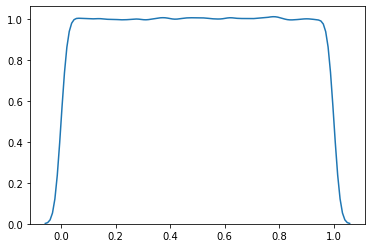

In [7]:
x = numpy.random.uniform(size=1000000)
seaborn.kdeplot(x)